# AMOCarray demo

The purpose of this notebook is to demonstrate the functionality of `AMOCarray`.

The demo is organised to show

- Step 1: Loading and plotting a sample dataset

- Step 2: Exploring the dataset attributes and variables.

Note that when you submit a pull request, you should `clear all outputs` from your python notebook for a cleaner merge.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import importlib_resources
import importlib

import xarray as xr
import os
import pooch
from amocarray import readers, writers, plotters, tools, utilities


/home/runner/work/amocarray/amocarray/amocarray/tools.py:160: SyntaxWarning: invalid escape sequence '\d'
  fill_val = 2 ** (int(re.findall("\d+", str(new_dtype))[0]) - 1) - 1


In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, 'data')

In [3]:
# Load data from data/moc_transports
ds = readers.load_sample_dataset()
type(ds)

xarray.core.dataset.Dataset

In [4]:
plotters.show_contents(ds)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
moc_mar_hc10,time,Sv,,,float64
t_aiw10,time,Sv,,,float64
t_bw10,time,Sv,,,float64
t_ek10,time,Sv,,,float64
t_gs10,time,Sv,,,float64
t_ld10,time,Sv,,,float64
t_therm10,time,Sv,,,float64
t_ud10,time,Sv,,,float64
t_umo10,time,Sv,,,float64


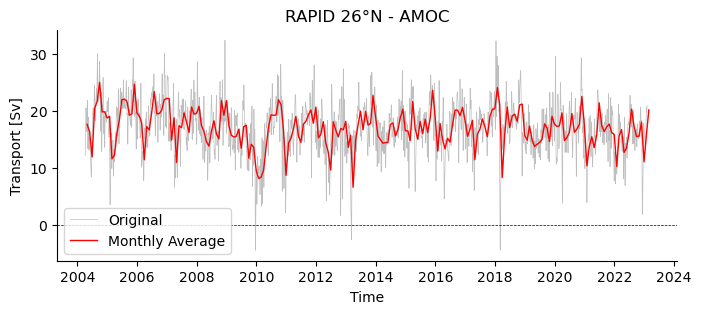

In [5]:
import matplotlib.pyplot as plt

# Resample the dataset to monthly averages
ds_monthly = ds.resample(time='ME').mean()

# Initialize the figure and axes with a specific figure size
fig, axes = plt.subplots(figsize=(8, 3))

# Plot the original dataset in thin grey
plt.plot(ds['time'], ds['moc_mar_hc10'], color='grey', alpha=0.5, linewidth=0.5, label='Original')

# Plot the monthly averaged dataset in thick red
plt.plot(ds_monthly['time'], ds_monthly['moc_mar_hc10'], color='red', linewidth=1, label='Monthly Average')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Customize the axes
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Add title and labels
plt.title('RAPID 26°N - AMOC')
plt.xlabel('Time')
plt.ylabel('Transport [Sv]')
plt.legend()



In [6]:
datasets16 = readers.read_16N("https://mooring.ucsd.edu/move/nc/")

OS_MOVE_TRANSPORTS.nc
OS_MOVE_TRANSPORTS.nc
https://mooring.ucsd.edu/move/nc//OS_MOVE_TRANSPORTS.nc


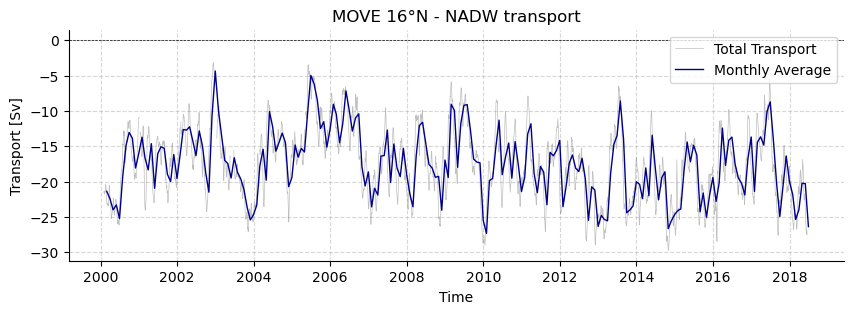

In [7]:
# Resample the dataset to monthly averages
ds_monthly = datasets16.resample(TIME='ME').mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the total transport from the MOVE dataset in thin grey
ax.plot(datasets16['TIME'], datasets16['TRANSPORT_TOTAL'], color='grey', alpha=0.5, linewidth=0.5, label='Total Transport')

# Plot the monthly averaged dataset in thick red
ax.plot(ds_monthly['TIME'], ds_monthly['TRANSPORT_TOTAL'], color='darkblue', linewidth=1, label='Monthly Average')
# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Customize the axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels, title, and legend
ax.set_title('MOVE 16°N - NADW transport')
ax.set_xlabel('Time')
ax.set_ylabel('Transport [Sv]')
ax.legend()

# Customize the grid
ax.grid(True, linestyle='--', alpha=0.5)

In [8]:
importlib.reload(readers)
dataset = readers.read_osnap(None, ['OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc'])


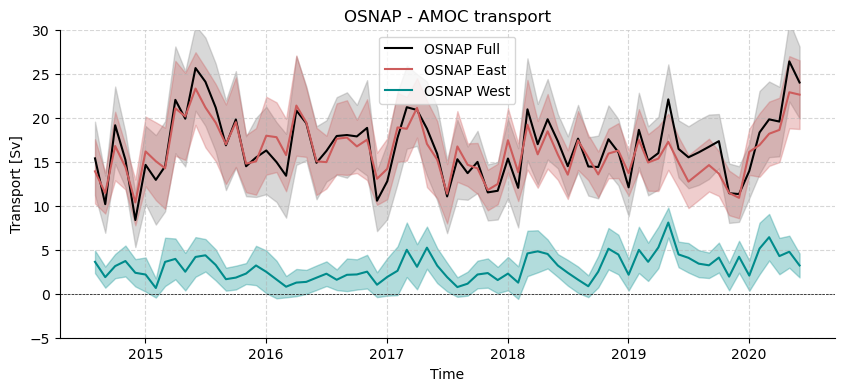

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Add shaded error bars using MOC_ALL_ERR
# Add shaded error bars for MOC_ALL
ax.set_clip_on(False)

ax.fill_between(dataset['TIME'], dataset['MOC_ALL'] - dataset['MOC_ALL_ERR'], dataset['MOC_ALL'] + dataset['MOC_ALL_ERR'], color='grey', alpha=0.3)

# Add shaded error bars for MOC_EAST in orange
ax.fill_between(dataset['TIME'], dataset['MOC_EAST'] - dataset['MOC_EAST_ERR'], dataset['MOC_EAST'] + dataset['MOC_EAST_ERR'], color='indianred', alpha=0.3)

# Add shaded error bars for MOC_WEST in dark cyan
ax.fill_between(dataset['TIME'], dataset['MOC_WEST'] - dataset['MOC_WEST_ERR'], dataset['MOC_WEST'] + dataset['MOC_WEST_ERR'], color='darkcyan', alpha=0.3)

# Plot the MOC_ALL time series
ax.plot(dataset['TIME'], dataset['MOC_ALL'], color='black', label='OSNAP Full')
ax.plot(dataset['TIME'], dataset['MOC_EAST'], color='indianred', label='OSNAP East')
ax.plot(dataset['TIME'], dataset['MOC_WEST'], color='darkcyan', label='OSNAP West')

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Customize the axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-limits but allow the plot to go outside the limits
ax.set_ylim(-5, 30)
ax.set_clip_on(False)

# Customize the plot
ax.set_title('OSNAP - AMOC transport')
ax.set_xlabel('Time')
ax.set_ylabel('Transport [Sv]')
ax.legend(loc='best')
ax.grid(True, linestyle='--', alpha=0.5)